In [2]:
# Getting the dataset
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 35.18 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
!ls pubmed-rct

PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [4]:
!ls /content/pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.zip


In [5]:
import os
dir = '/content/pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign'
filesnames = os.listdir(dir)
filesnames

['dev.txt', 'train.zip', 'test.txt']

In [6]:
train_data = dir + '/' + filesnames[0]
test_data = open(dir + '/' + filesnames[1], 'r')
train_data

'/content/pubmed-rct/PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.txt'

In [7]:
DIR = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'
FILENAMES = os.listdir(DIR)
FILENAMES

['dev.txt', 'train.txt', 'test.txt']

In [8]:
train = DIR + '/' + FILENAMES[1]
test = DIR + '/' + FILENAMES[1]
train

'/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'

In [9]:
def get_line(data_dir):
  with open(data_dir, 'r') as f:
    return f.readlines()


In [10]:
training_lines = get_line(train)
training_lines[:27]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [11]:
training_lines[:2]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n']

In [12]:
def text_preprocessor(filename):
  input_line = get_line(filename)
  abstract_text = ""
  abstract_sample = []

  for line in input_line:
    if line.startswith('###'):
      abstract_id = line
      abstract_text = ""
    elif line.isspace():
      abstract_text_split = abstract_text.splitlines()

      for abstract_text_number, abstract_text_line in enumerate(abstract_text_split):
        line_data = {}
        target_line = abstract_text_line.split('\t')
        line_data['target'] = target_line[0]
        line_data['text'] = target_line[1].lower()
        line_data['number'] = abstract_text_number
        line_data['total_lines'] = len(abstract_text_split)-1
        abstract_sample.append(line_data)

    else:
      abstract_text += line
  return abstract_sample

In [13]:
training_data = text_preprocessor(train)
len(training_data)

180040

In [14]:
import pandas as pd
df = pd.DataFrame(training_data)
df.head(14)

,target,text,number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [15]:
# Distribution of target
df['target'].value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


In [16]:
test = DIR + '/' + FILENAMES[2]
test_data = text_preprocessor(test)
len(test_data)

30135

In [17]:
val = DIR + '/' + FILENAMES[0]
val_data = text_preprocessor(val)
len(val_data)

30212

In [18]:
test_df = pd.DataFrame(test_data)
test_df.head(14)

,target,text,number,total_lines
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8
6,RESULTS,multivariable analyses revealed that patients ...,6,8
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12


In [19]:
val_df = pd.DataFrame(val_data)
val_df.head(14)

,target,text,number,total_lines
0,BACKGROUND,ige sensitization to aspergillus fumigatus and...,0,9
1,BACKGROUND,it is not clear whether these patients would b...,1,9
2,OBJECTIVE,we sought to determine whether a @-month cours...,2,9
3,METHODS,asthmatic patients who were ige sensitized to ...,3,9
4,METHODS,primary outcomes were improvement in quality o...,4,9
5,RESULTS,sixty-five patients were randomized .,5,9
6,RESULTS,fifty-nine patients started treatment ( @ rece...,6,9
7,RESULTS,fifty-six patients took the full @ months of m...,7,9
8,RESULTS,"between the voriconazole and placebo groups , ...",8,9
9,CONCLUSIONS,we were unable to show a beneficial effect of ...,9,9


<Axes: >

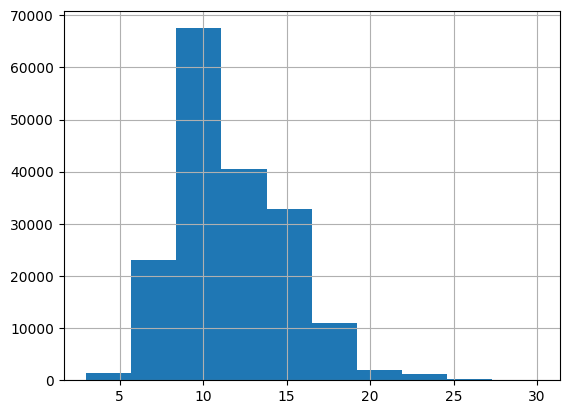

In [20]:
df.total_lines.hist()

<Axes: xlabel='target'>

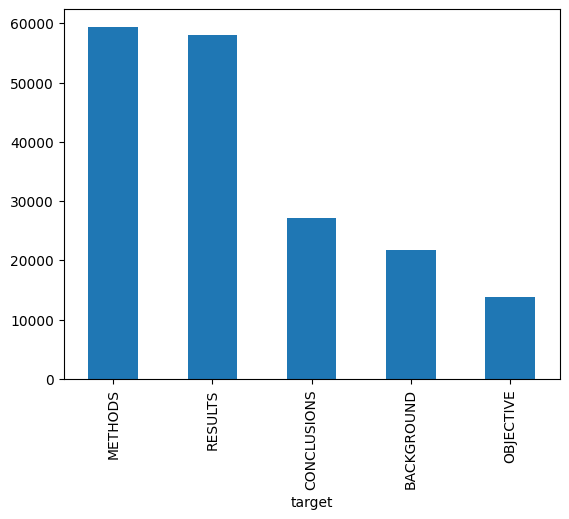

In [21]:
df['target'].value_counts().plot(kind='bar')

In [22]:
# Getting list of line

training_sentences = df['text'].tolist()
test_sentences = test_df['text'].tolist()
val_sentences = val_df['text'].tolist()

len(training_sentences), len(test_sentences), len(val_sentences)

(180040, 30135, 30212)

In [23]:
training_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

making numeric labels

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
training_labels_ohe = ohe.fit_transform(df[['target']].to_numpy().reshape(-1,1))
test_labels_ohe = ohe.fit_transform(df[['target']].to_numpy().reshape(-1,1))
val_labels_ohe = ohe.fit_transform(df[['target']].to_numpy().reshape(-1,1))

In [25]:
training_labels_ohe[:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [26]:
# encoding with sklearn LebelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

training_labels_le = le.fit_transform(df['target'].to_numpy())
test_labels_le = le.transform(test_df['target'].to_numpy())
val_labels_le = le.transform(val_df['target'].to_numpy())

training_labels_le[:5]

array([3, 2, 2, 2, 2])

In [27]:
le.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

**Building our first model**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [29]:
model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

In [32]:
model_0.fit(training_sentences, training_labels_le)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [33]:
model_0.score(training_sentences, training_labels_le)

0.7516829593423684